# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 4.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you hav

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again*.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [ ]:
# To help with reading and manipulation of data
import numpy as np
from numpy import array
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer

# To do one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# To build a decision tree model
from sklearn.tree import DecisionTreeClassifier

# To build a ensemble models
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# To tune the model
from sklearn.model_selection import GridSearchCV


# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)


# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/content/drive/My Drive/PGP AIML/Advanced Machine Learning/Credit Card Users Churn Prediction/BankChurners.csv')



## Data Overview

- Observations
- Sanity checks

In [ ]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,NaN,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,NaN,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
df.shape

(10127, 21)

- There are 10,127 rows (clients) and 21 columns (variables).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are 6 string variables and 15 numerical variables.

## Exploratory Data Analysis (EDA)

**Questions**:

1. How is the total transaction amount distributed?
- Total transaction amount has a multi-modal distribution with 4 peaks: 2 higher ones at ~1,200 and ~4,000 and two low ones at ~7,500 and ~15,000. These could indicate potential different clusters of customers.
2. What is the distribution of the level of education of customers?
- Education presents a bimodal distribution with one peak being high school and the other graduate.
3. What is the distribution of the level of income of customers?
- Income level follow a right-skewed distribution, which means a large part of clients have lower income.
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
- The correlation between total_ct_change_Q4_Q1 and Attrition_Flag is negative (-0.29). Although this is not a high negative correlation, the higher the variation between Q4 and Q1, less customers have their accounts closed.
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
- The correlation between the number of months a customer was inactive in the last 12 months and account status is positive (0.15). Although it is a weak correlation, it could indicate that number of months a customer was inactive has a influence in account status.
6. What are the attributes that have a strong correlation with each other?
- The attributes with strong correlation are:
 - Open to buy credit and credit limit with 1 correlation - this correlation is so high that these variables might be redundant.
 - Transaction amount and transaction count with 0.81 correlation.
 - Months on the book and age with 0.79 correlation.
 - Total revolving balance and average utilization ratio with 0.62 correlation.


In [ ]:
# check for duplicated clients
len(df['CLIENTNUM'])-len(df['CLIENTNUM'].drop_duplicates())

0

In [ ]:
# create a copy of the data and drop client number because it is not relevant for the model
data = df.copy()
data.drop('CLIENTNUM', axis=1, inplace=True)

In [ ]:
# defining the list of categorical features to plot
features = data.select_dtypes(exclude=['number']).columns.tolist()

for feature in features:
    print(data[feature].value_counts()/len(data[feature]))

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: count, dtype: float64
Gender
F    0.529081
M    0.470919
Name: count, dtype: float64
Education_Level
Graduate         0.308877
High School      0.198776
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: count, dtype: float64
Marital_Status
Married     0.462822
Single      0.389355
Divorced    0.073862
Name: count, dtype: float64
Income_Category
Less than $40K    0.351634
$40K - $60K       0.176755
$80K - $120K      0.151575
$60K - $80K       0.138442
abc               0.109805
$120K +           0.071788
Name: count, dtype: float64
Card_Category
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: count, dtype: float64


In [ ]:
replaceStruct = {"Attrition_Flag": {"Existing Customer": 0, "Attrited Customer": 1},
                "Education_Level": {"Uneducated": 1, "High School":2 , "College": 3, "Graduate": 4,"Post-Graduate": 5, "Doctorate": 6},
                "Income_Category":     {"Less than $40K": 1, "$40K - $60K": 2,  "$60K - $80K": 3, "$80K - $120K": 4, "$120K +": 5,"abc": np.NaN},
                "Card_Category":     {"Blue": 1, "Silver": 2 ,"Gold": 3 ,"Platinum": 4 }
                    }

In [ ]:
data=data.replace(replaceStruct)
data.head(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,2.0,Married,3.0,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,4.0,Single,1.0,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,4.0,Married,4.0,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,2.0,NaN,1.0,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,1.0,Married,3.0,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,0,44,M,2,4.0,Married,2.0,1,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,0,51,M,4,NaN,Married,5.0,3,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,0,32,M,0,2.0,NaN,3.0,2,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,0,37,M,3,1.0,Single,3.0,1,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,0,48,M,2,4.0,Single,4.0,1,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [ ]:
features.remove("Gender")
features.remove("Marital_Status")

for feature in features:
   print(data[feature].value_counts()/len(data[feature]))

Attrition_Flag
0    0.83934
1    0.16066
Name: count, dtype: float64
Education_Level
4.0    0.308877
2.0    0.198776
1.0    0.146835
3.0    0.100030
5.0    0.050953
6.0    0.044534
Name: count, dtype: float64
Income_Category
1.0    0.351634
2.0    0.176755
4.0    0.151575
3.0    0.138442
5.0    0.071788
Name: count, dtype: float64
Card_Category
1    0.931767
2    0.054804
3    0.011455
4    0.001975
Name: count, dtype: float64


In [ ]:
data.describe()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,8608.000000,9015.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,2.346203,3.061106,2.342984,1.083638,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,1.298908,1.412810,1.356455,0.333784,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,1.000000,1.000000,1.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,1.000000,2.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,2.000000,3.000000,2.000000,1.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,3.000000,4.000000,4.000000,1.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,5.000000,6.000000,5.000000,4.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


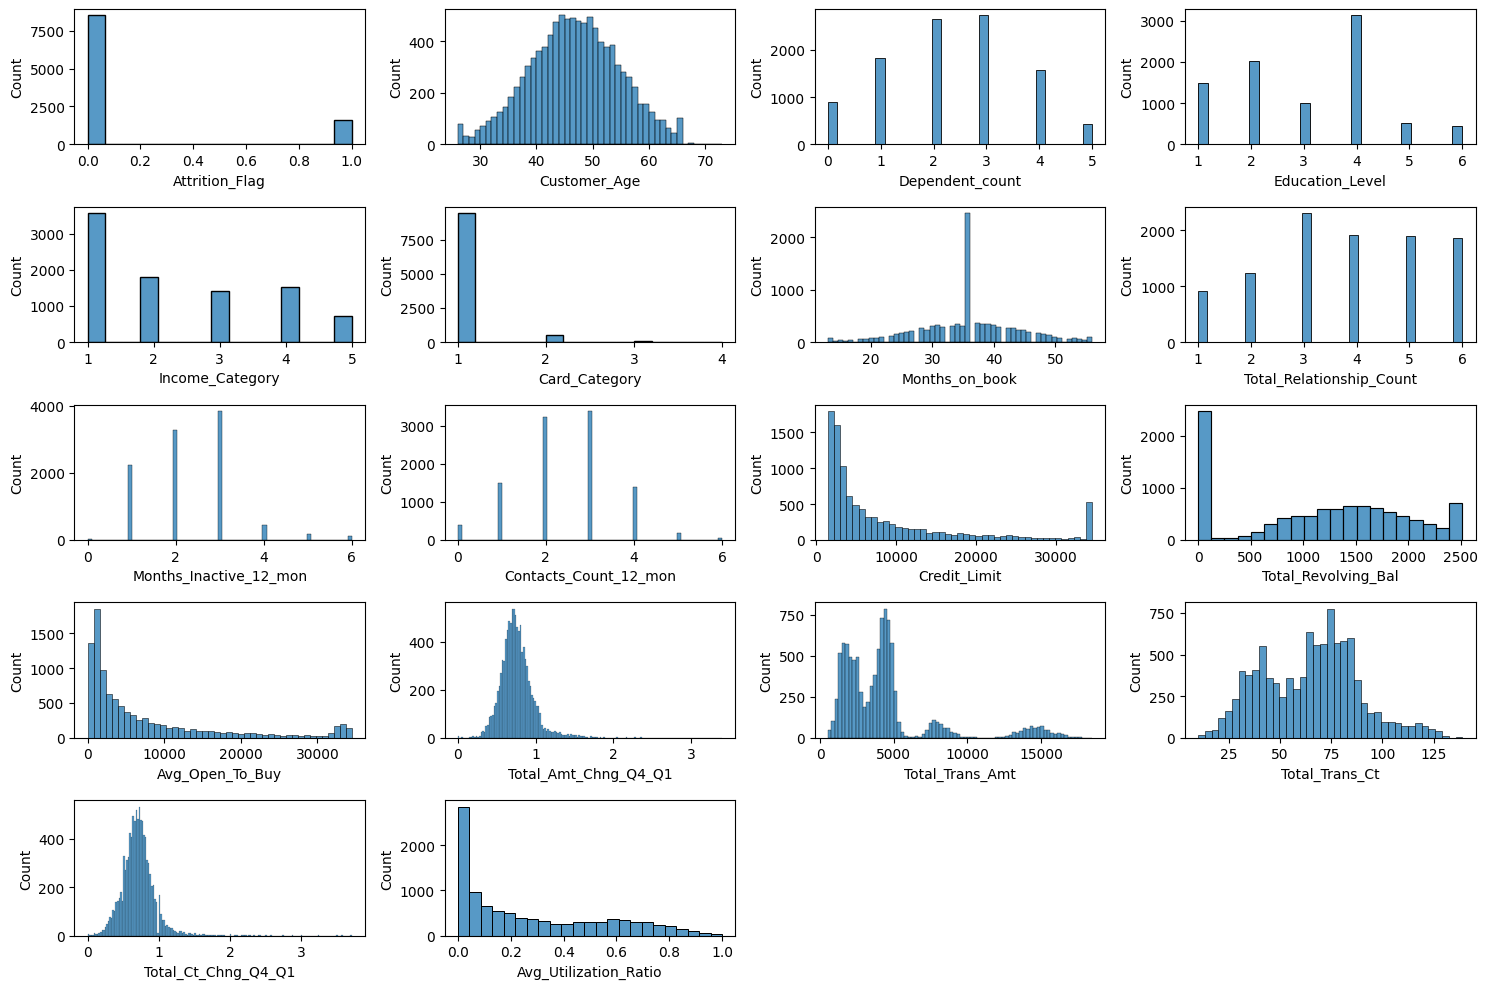

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = data.select_dtypes(include=['number']).columns.tolist()

# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(5, 4, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

- The two numerical demographic variables (customer age and dependent count) follow a normal distribution.
- Credit limit, average open to buy, and average utilization follow a right-skewed distribution, which means a large part of clients have lower credit limit, pay the full balance in their account, and have a low utilization relative to their limit.

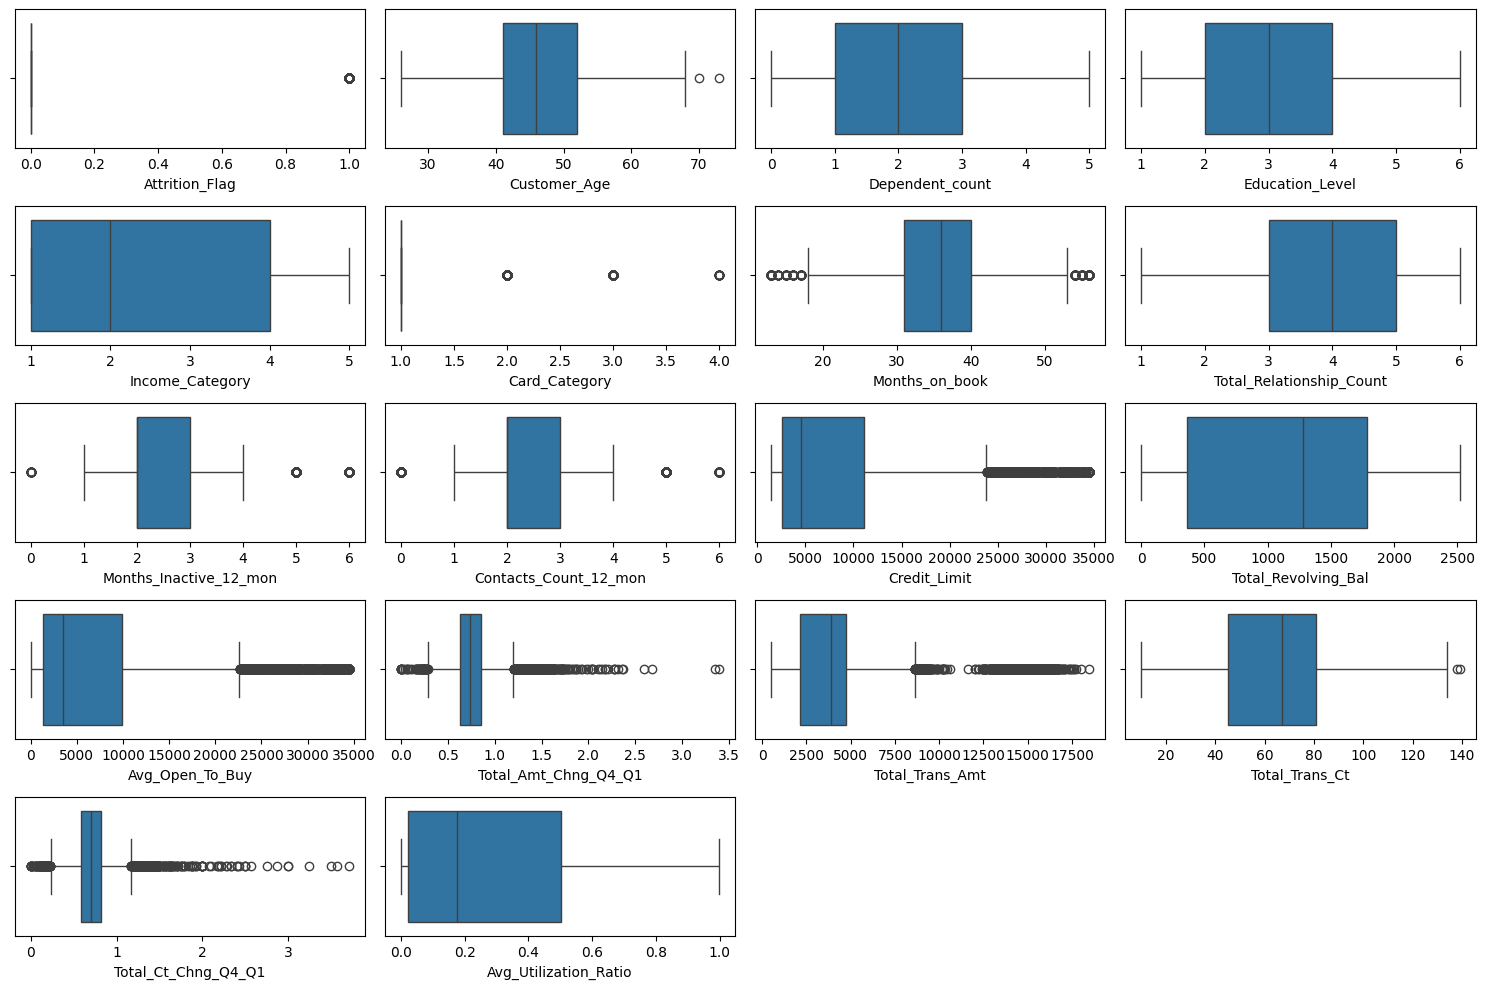

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = data.select_dtypes(include=['number']).columns.tolist()

# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(5, 4, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

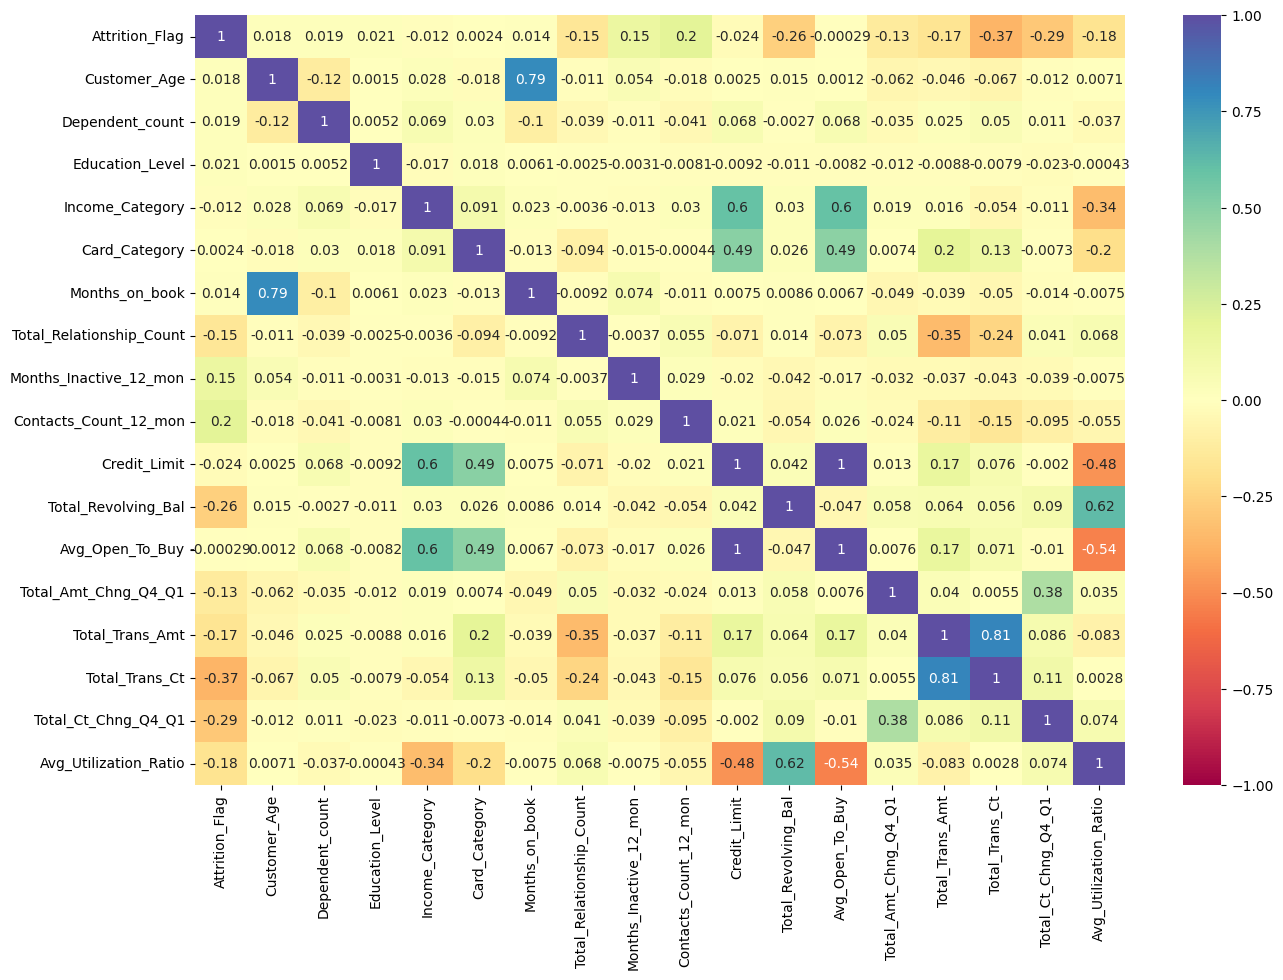

In [ ]:
# defining the list of numerical features to plot
features = data.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(15,10))
sns.heatmap(data[features].corr(), annot=True, cmap='Spectral', vmin=-1,vmax=1)
plt.show()

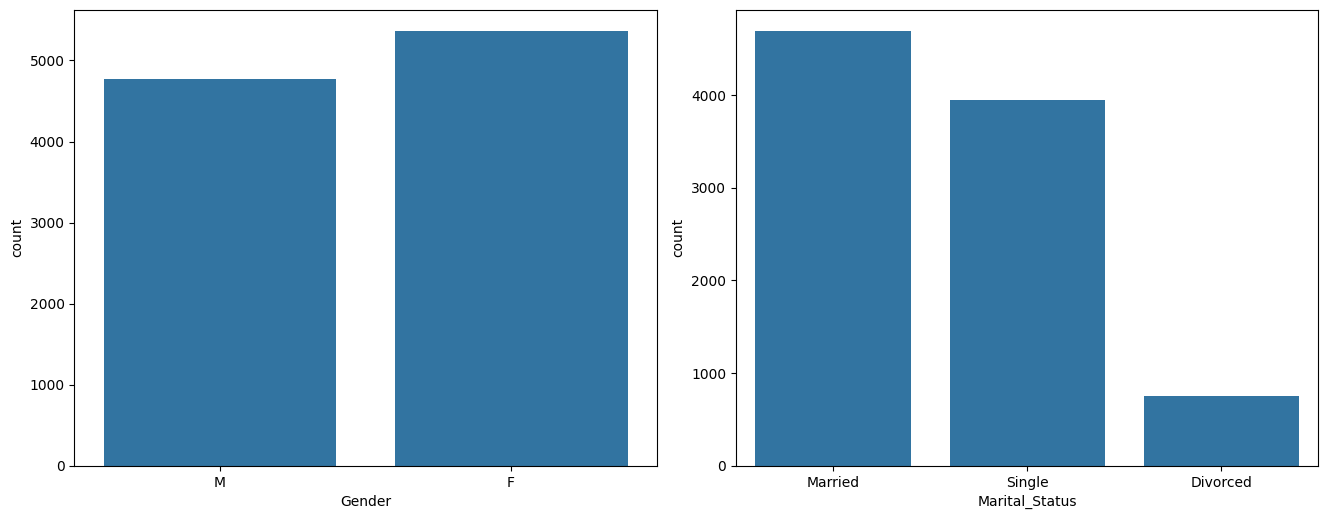

In [ ]:
# defining the figure size
plt.figure(figsize=(20, 10))

# defining the list of categorical features to plot
features = data.select_dtypes(exclude=['number']).columns.tolist()


# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)    # assign a subplot in the main plot
    sns.countplot(data=data, x=feature)    # plot the histogram


plt.tight_layout()    # to add spacing between plots
plt.show()

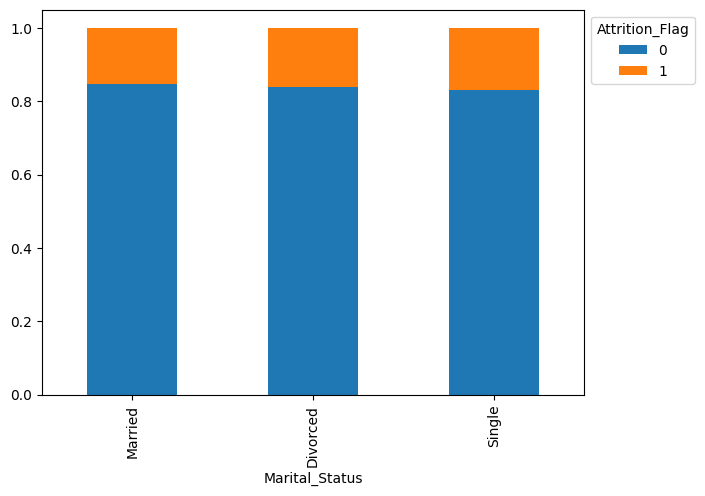

In [ ]:
tab = pd.crosstab(
    data['Marital_Status'],
    data['Attrition_Flag'],
    normalize='index'
).sort_values(by=0, ascending=False)

tab.plot(kind='bar', stacked=True, figsize=(7, 5))
plt.xlabel('Marital_Status')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Attrition_Flag');

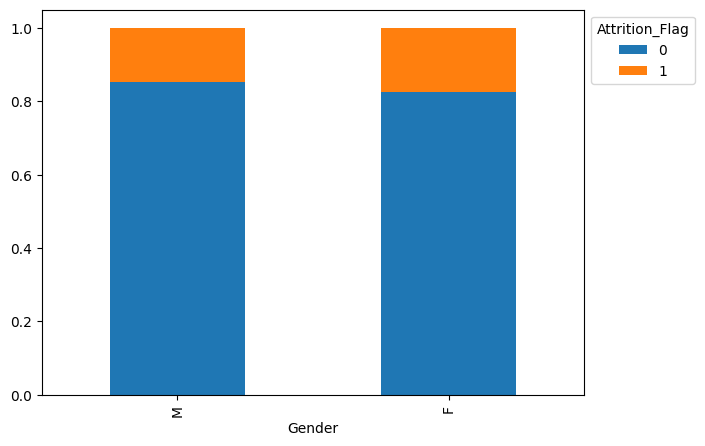

In [ ]:
tab2 = pd.crosstab(
    data['Gender'],
    data['Attrition_Flag'],
    normalize='index'
).sort_values(by=0, ascending=False)

tab2.plot(kind='bar', stacked=True, figsize=(7, 5))
plt.xlabel('Gender')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Attrition_Flag');

- Attrition has a similar proportion between gender and marital status, which could indicate that these variables might not be relevant to predict attrition.

In [ ]:
# defining the list of numerical features to plot
features = data.select_dtypes(include=['number']).columns.tolist()

sns.pairplot(data=data, vars=features, hue='Attrition_Flag', diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

## Data Pre-processing

In [20]:
# turning ordinal categorical variables changed during EDA into category type
data["Education_Level"] = data["Education_Level"].astype("category")
data["Income_Category"] = data["Income_Category"].astype("category")
data["Card_Category"] = data["Card_Category"].astype("category")

data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,2.0,Married,3.0,1,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,4.0,Single,1.0,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,4.0,Married,4.0,1,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,2.0,NaN,1.0,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,1.0,Married,3.0,1,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [21]:
# separating the independent and dependent variables
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

In [22]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(5063, 29) (3038, 29) (2026, 29)


In [23]:
X_train.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Education_Level_6.0,Marital_Status_Married,Marital_Status_Single,Income_Category_2.0,Income_Category_3.0,Income_Category_4.0,Income_Category_5.0,Card_Category_2,Card_Category_3,Card_Category_4
2327,51,1,45,5,2,2,6778.0,865,5913.0,0.992,...,False,True,False,True,False,False,False,False,False,False
1411,59,0,53,6,1,4,12554.0,2169,10385.0,0.529,...,False,True,False,False,True,False,False,False,False,False
7831,61,1,50,3,3,1,3359.0,1405,1954.0,0.684,...,False,True,False,False,False,False,False,False,False,False
6336,43,2,35,5,2,2,1849.0,1293,556.0,0.835,...,False,False,True,False,True,False,False,False,False,False
5020,50,2,35,4,5,3,34516.0,668,33848.0,0.894,...,False,True,False,False,False,False,True,False,True,False


## Missing value imputation




In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5063 entries, 2327 to 5525
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              5063 non-null   int64  
 1   Dependent_count           5063 non-null   int64  
 2   Months_on_book            5063 non-null   int64  
 3   Total_Relationship_Count  5063 non-null   int64  
 4   Months_Inactive_12_mon    5063 non-null   int64  
 5   Contacts_Count_12_mon     5063 non-null   int64  
 6   Credit_Limit              5063 non-null   float64
 7   Total_Revolving_Bal       5063 non-null   int64  
 8   Avg_Open_To_Buy           5063 non-null   float64
 9   Total_Amt_Chng_Q4_Q1      5063 non-null   float64
 10  Total_Trans_Amt           5063 non-null   int64  
 11  Total_Trans_Ct            5063 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1       5063 non-null   float64
 13  Avg_Utilization_Ratio     5063 non-null   float64
 14  Gender_M  

- No missing values post dummy inclusion.

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [26]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [27]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return score_list # returning the list with train and test scores

### Model Building with original data

In [28]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1,eval_metric='logloss')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.976629766297663
Random forest: 1.0
Gradient Boosting: 0.906519065190652
AdaBoost: 0.8610086100861009
XGBoost: 1.0

Validation Performance:

Bagging: 0.7868852459016393
Random forest: 0.7520491803278688
Gradient Boosting: 0.8319672131147541
AdaBoost: 0.8299180327868853
XGBoost: 0.8647540983606558


- All models showed high recall in training set, which could indicate overfitting.
- AdaBoost showed similar performance in both training and validation sets.
- XGBoost had the best performance in both training and validation sets, but there is a considerable gap in recall performance between them that shows overfitting in training set.

### Model Building with Oversampled data


In [29]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [30]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1,eval_metric='logloss')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9976470588235294
Random forest: 1.0
Gradient Boosting: 0.9785882352941176
AdaBoost: 0.9654117647058823
XGBoost: 1.0

Validation Performance:

Bagging: 0.8504098360655737
Random forest: 0.8565573770491803
Gradient Boosting: 0.9077868852459017
AdaBoost: 0.8954918032786885
XGBoost: 0.8995901639344263


- All models increased recall in the validation set, which means the models are performing better in predicting unseen data with oversampled data.
- AdaBoost and Gradient Boosting showed good improvement in both training and validation sets compared to the model builing with original data.
- XGBoost had already shown high recall score in the original data but still had a slight increase in validation performance with oversampled data.

### Model Building with Undersampled data

In [31]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [32]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1,eval_metric='logloss')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.992619926199262
Random forest: 1.0
Gradient Boosting: 0.985239852398524
AdaBoost: 0.9532595325953259
XGBoost: 1.0

Validation Performance:

Bagging: 0.9200819672131147
Random forest: 0.9323770491803278
Gradient Boosting: 0.9364754098360656
AdaBoost: 0.9385245901639344
XGBoost: 0.9508196721311475


- All models increased recall (all above 90) in the validation set with undersampled data compared to original and oversampled data, which means the models are performing better in predicting unseen data.
- There is still a gap between training and validation sets, but the gap is now much smaller when compared to original and oversampled data.
- Although XGBoost still shows the best performance in training and validation sets, there is a smaller difference between its performance and other models with undersampled data.

### Hyperparameter Tuning

### Gradient Boosting (undersampled)

In [33]:
from sklearn.model_selection import RandomizedSearchCV

# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

#Calling RandomizedSearchCV
randomized_cv_GradientBoosting = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_GradientBoosting.fit(X_train_un,y_train_un)

best_params_rand_GradientBoosting = randomized_cv_GradientBoosting.best_params_
best_model_rand_GradientBoosting = randomized_cv_GradientBoosting.best_estimator_


print("Best parameters are {} with CV score={}:" .format(randomized_cv_GradientBoosting.best_params_,randomized_cv_GradientBoosting.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.8868514731500416:


In [34]:
sets = ['train','val']

GradientBoosting_tuned_un_train = model_performance_classification_sklearn(best_model_rand_GradientBoosting,X_train_un,y_train_un)
GradientBoosting_tuned_un_val = model_performance_classification_sklearn(best_model_rand_GradientBoosting,X_val,y_val)

GradientBoosting_tuned_un = pd.concat([GradientBoosting_tuned_un_train,GradientBoosting_tuned_un_val])
GradientBoosting_tuned_un['Set'] = sets
GradientBoosting_tuned_un['Model'] = 'GradientBoosting'
GradientBoosting_tuned_un = GradientBoosting_tuned_un.loc[:,['Model','Set','Accuracy','Recall', 'Precision', 'F1']]

GradientBoosting_tuned_un

,Model,Set,Accuracy,Recall,Precision,F1
0,GradientBoosting,train,1.000000,1.000000,1.000000,1.000000
0,GradientBoosting,val,0.912772,0.877049,0.676145,0.763604


### AdaBoost (undersampled)

In [35]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05]
}

#Calling RandomizedSearchCV
randomized_cv_AdaBoost = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_AdaBoost.fit(X_train_un,y_train_un)

best_params_rand_AdaBoost = randomized_cv_AdaBoost.best_params_
best_model_rand_AdaBoost = randomized_cv_AdaBoost.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv_AdaBoost.best_params_,randomized_cv_AdaBoost.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.1} with CV score=0.9076952207831553:


In [36]:
sets = ['train','val']

AdaBoost_tuned_un_train = model_performance_classification_sklearn(best_model_rand_AdaBoost,X_train_un,y_train_un)
AdaBoost_tuned_un_val = model_performance_classification_sklearn(best_model_rand_AdaBoost,X_val,y_val)

AdaBoost_tuned_un = pd.concat([AdaBoost_tuned_un_train,AdaBoost_tuned_un_val])
AdaBoost_tuned_un['Set'] = sets
AdaBoost_tuned_un['Model'] = 'AdaBoost'
AdaBoost_tuned_un = AdaBoost_tuned_un.loc[:,['Model','Set','Accuracy','Recall', 'Precision', 'F1']]

AdaBoost_tuned_un

,Model,Set,Accuracy,Recall,Precision,F1
0,AdaBoost,train,0.897909,0.920049,0.881037,0.900120
0,AdaBoost,val,0.901251,0.911885,0.633903,0.747899


### XGBoost (undersampled)

In [37]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

# Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

#Calling RandomizedSearchCV
randomized_cv_XGBoost = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring='recall', cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv_XGBoost.fit(X_train_un,y_train_un)

best_params_rand_XGBoost = randomized_cv_XGBoost.best_params_
best_model_rand_XGBoost = randomized_cv_XGBoost.best_estimator_

print("Best parameters are {} with CV score={}:" .format(randomized_cv_XGBoost.best_params_,randomized_cv_XGBoost.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 75, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9864727713398469:


In [38]:
sets = ['train','val']

XGBoost_tuned_un_train = model_performance_classification_sklearn(best_model_rand_XGBoost,X_train_un,y_train_un)
XGBoost_tuned_un_val = model_performance_classification_sklearn(best_model_rand_XGBoost,X_val,y_val)

XGBoost_tuned_un = pd.concat([XGBoost_tuned_un_train,XGBoost_tuned_un_val])
XGBoost_tuned_un['Set'] = sets
XGBoost_tuned_un['Model'] = 'XGBoost'
XGBoost_tuned_un = XGBoost_tuned_un.loc[:,['Model','Set','Accuracy','Recall', 'Precision', 'F1']]

XGBoost_tuned_un

,Model,Set,Accuracy,Recall,Precision,F1
0,XGBoost,train,0.953260,1.000000,0.914511,0.955347
0,XGBoost,val,0.900922,0.981557,0.621271,0.760921


## Model Comparison and Final Model Selection

- Gradient Boosting, AdaBoost, and XGBoost using undersampled data were selected for model tuning because they were the ones that showed better performance in validation set.
- Gradient Boosting recall in training set improved but performed worse in validation set after tuning. In this case, tuning might have increased overfitting for this model.
- AdaBoost recall after tuning got worse compared to pre-tuning. This could indicate that the ranges of hyperparameters in the grid might be off compared to AdaBoost recommended (built-in) hyperparameters and/or that the random selection performed by RandomizedSearchCV failed to find the best hyperparameter combination.
- XGBoost had its recall for validation set increased and the model is now performing close to 1 in validation recall (0.98).


### Test set final performance

In [39]:
XGBoost_tuned_un_test = model_performance_classification_sklearn(best_model_rand_XGBoost,X_test,y_test)
XGBoost_tuned_un_test['Set'] = 'test'
XGBoost_tuned_un_test['Model'] = 'XGBoost'
XGBoost_tuned_un_all = pd.concat([XGBoost_tuned_un.loc[:,['Model','Set','Accuracy','Recall', 'Precision', 'F1']],XGBoost_tuned_un_test.loc[:,['Model','Set','Accuracy','Recall', 'Precision', 'F1']]])
XGBoost_tuned_un_all

,Model,Set,Accuracy,Recall,Precision,F1
0,XGBoost,train,0.953260,1.000000,0.914511,0.955347
0,XGBoost,val,0.900922,0.981557,0.621271,0.760921
0,XGBoost,test,0.891905,0.975460,0.601134,0.743860


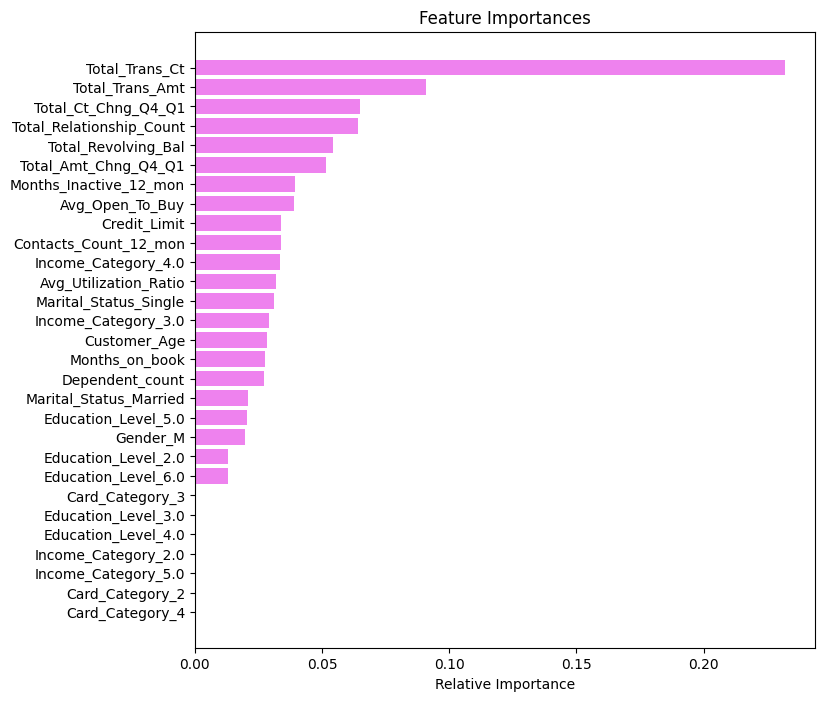

In [40]:
# Feature importance
importances = best_model_rand_XGBoost.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_test.columns)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

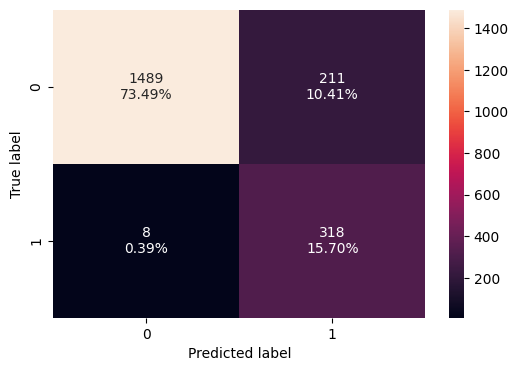

In [41]:
from sklearn import metrics

def plot_confusion_matrix(model, predictors, target):

  y_pred = model.predict(predictors)
  cm = confusion_matrix(target, y_pred)
  labels = np.array(
      [
          ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
          for item in cm.flatten()
      ]
  ).reshape(2, 2)
  plt.figure(figsize=(6, 4))
  sns.heatmap(cm, annot=labels, fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")

plot_confusion_matrix(best_model_rand_XGBoost, X_test, y_test)

- XGBoost was the chosen model (trained in undersampled data and tuned) because its recall score was the highest for both training and validation before and after tuning.
- The final test recall score for this model was 0.975, which is close to 1. With higher recall, the model was able to correctly identify more customers with closed accounts (318 customers or 15.7% in the test set) while minimizing the number of false negatives (only 8 customers or 0.39% in the test set).
- The model also showed a small gap between train, validation, and test sets, which means it is not overfitting and performs similarly in unseen data.

# Business Insights and Conclusions

- This model will allow the bank to accurately predict customer attrition and allow it to act pro-actively to minimize churn by:
 - Preparing potential offers that will reduce the likelihood of churn. For instance, the bank could provide exclusive discounts with partner retailers to customers with high likelihood of closing their accounts (information provided by the model). By targeting these offers to only customers with high likelihood of closing their accounts, the company also saves on potential costs of making offers to all customers.
 - The bank could also review the benefits of its credit card to try to increase transaction amount/count, two of the most important features in the model, and thus decrease churn. For example, it could provide extra cash back or more rewards for customers with low transaction amount/count.
  - The bank could conduct qualitative research with customers that have recently closed their accounts to identify the underlying reasons that make these customers decrease transaction amount/count and eventually close their accounts. These insights could help the company understand customers pain points and mitigate them.
  - Finally, the bank could gather data related to the credit card costs (fees) paid by customers and include it in the model. Therefore, the correlation between credit usage and fees paid could be analyzed and thus potentially increase the model's performance.

In [42]:
!jupyter nbconvert --to html '/content/drive/My Drive/PGP AIML/Advanced Machine Learning/Credit Card Users Churn Prediction/hbarbosa_AML_Project_LearnerNotebook_FullCode.ipynb'

[NbConvertApp] Converting notebook /content/drive/My Drive/PGP AIML/Advanced Machine Learning/Credit Card Users Churn Prediction/hbarbosa_AML_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 1340239 bytes to /content/drive/My Drive/PGP AIML/Advanced Machine Learning/Credit Card Users Churn Prediction/hbarbosa_AML_Project_LearnerNotebook_FullCode.html


***